# Determination of the most profitable oil production region

We must decide where to drill a new well.

We have been provided with oil samples in three regions: in 10,000 fields each, where we have measured the quality of the oil and the volume of its reserves. We need to create a machine learning model that will help us determine the region where production will bring the greatest profit. Analysis of the possible profits and risks using the *Bootstrap.* technique.

Steps to select a site:

- Search for deposits in the selected region, determine the values of the signs for each;
- Build a model and estimate the volume of reserves;
- Select the deposits with the highest value estimates. The number of fields depends on the budget of the company and the cost of developing a well;
- The profit is equal to the total profit of the selected deposits.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

## Loading and preparing data

In [2]:
df_0 = pd.read_csv('/content/geo_data_0.csv')
df_1 = pd.read_csv('/content/geo_data_1.csv')
df_2 = pd.read_csv('/content/geo_data_2.csv')

In [3]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


The data is loaded correctly, there are no gaps.

Let's check the data for the presence of dependencies and the distribution of the target feature:

In [6]:
df_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


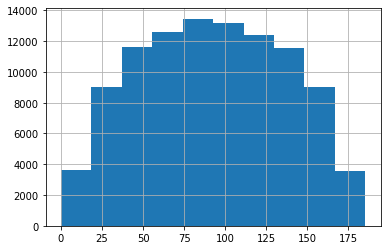

In [7]:
df_0['product'].hist()

In [8]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


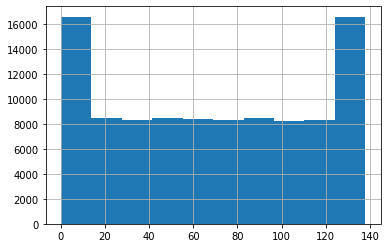

In [9]:
df_1['product'].hist()

In [10]:
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


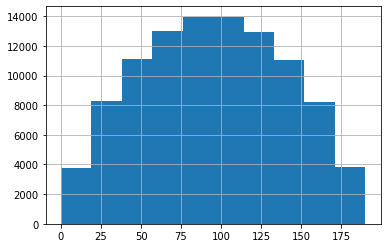

In [11]:
df_2['product'].hist()

The distributions are different, and the data from the second region look strange, but since the data were obtained synthetically and the task does not require large-scale transformations of the original data, we will work with what we have.

In [12]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Let's divide the data sets into features and target. While the data contains information about the ID of the point under study, which has no semantic meaning for building models, this information is discarded:

In [13]:
target_0 = df_0['product']
features_0 = df_0.drop(['product', 'id'], axis=1)
print(target_0.shape, features_0.shape)

(100000,) (100000, 3)


In [14]:
target_1 = df_1['product']
features_1 = df_1.drop(['product', 'id'], axis=1)
print(target_1.shape, features_1.shape)

(100000,) (100000, 3)


In [15]:
target_2 = df_2['product']
features_2 = df_2.drop(['product', 'id'], axis=1)
print(target_2.shape, features_2.shape)

(100000,) (100000, 3)


Data is loaded, validated, and prepared for use in machine learning.

## Train and validate the model

### Region №0

We split the dataset into training and test samples in the ratio of 75/25%.

In [16]:
train_features_0, test_features_0, train_target_0, test_target_0 = train_test_split(
features_0, target_0, test_size=0.25, random_state=12345)

Model - linear regression

In [17]:
model_0 = LinearRegression()
model_0.fit(train_features_0, train_target_0)

LinearRegression()

The model predictions for the test set are saved for further use

In [18]:
predict_0 = model_0.predict(test_features_0)

Model's RMSE:

In [19]:
mse_0 = mean_squared_error(test_target_0, predict_0)

In [20]:
mse_0**0.5

37.5794217150813

In [21]:
pd.Series(predict_0).mean()

92.59256778438035

### Region №1

In a similar way construct and analyze the model for the second region

In [22]:
train_features_1, test_features_1, train_target_1, test_target_1 = train_test_split(
features_1, target_1, test_size=0.25, random_state=12345)

In [23]:
model_1 = LinearRegression()
model_1.fit(train_features_1, train_target_1)

LinearRegression()

In [24]:
predict_1 = model_1.predict(test_features_1)

In [25]:
mse_1 = mean_squared_error(test_target_1, predict_1)

In [26]:
mse_1**0.5

0.893099286775617

In [27]:
pd.Series(predict_1).mean()

68.728546895446

### Region №2


In a similar way we construct and analyze the model for the second region

In [28]:
train_features_2, test_features_2, train_target_2, test_target_2 = train_test_split(
features_2, target_2, test_size=0.25, random_state=12345)

In [29]:
model_2 = LinearRegression()
model_2.fit(train_features_2, train_target_2)

LinearRegression()

In [30]:
predict_2 = model_2.predict(test_features_2)

In [31]:
mse_2 = mean_squared_error(test_target_2, predict_2)

In [32]:
mse_2**0.5

40.02970873393434

In [33]:
pd.Series(predict_2).mean()

94.96504596800489

### Conclusion

The models are created, the predictions are obtained, the results correspond to the differences between the second and the first with the third region previously determined.

## Preparing for Profit Calculation


Let's use constants for the calculation of economic indicators:
* budget - the budget for the development of fields in the region, 
* product_price - the cost of one unit of production (1000 barrels), 
* product_amount - the necessary oil reserves in the region to ensure breakeven production.

In [34]:
BUDGET = 10000000000
PRODUCT_PRICE = 450000

In [35]:
product_amount = BUDGET / PRODUCT_PRICE
product_amount

22222.222222222223

The average volume of reserves in the region should be higher than this value. Let's calculate the reserves in the regions:

In [36]:
pd.Series(predict_0).sample(n=200, random_state=12345).sum()

18066.757175770523

In [37]:
pd.Series(predict_1).sample(n=200, random_state=12345).sum()

14733.595879158143

In [38]:
pd.Series(predict_2).sample(n=200, random_state=12345).sum()

18741.229826615017

At first glance, all three regions do not have sufficient oil reserves to warrant cost-covering development. Therefore, it is necessary to perform an analysis using machine learning.

## Calculation of profit and risks

To calculate the economic prospects for the development of the fields in the regions, we will write the functions for calculating the profit, the 95% confidence interval for the average profit and the probability of loss.

In [39]:
def profit(sample):
    """The function of calculating the profit from oil production according to the model predictions"""
    return (sample.sum() * PRODUCT_PRICE - BUDGET)

In [40]:
state = RandomState(12345)
def bootstrap(predicted, true_product, count):
    """Function to calculate the average profit with 95% confidence interval 
    and loss probability using the bootstrap technique"""
    values = []
    true_product = pd.Series(true_product).reset_index(drop=True)
    for i in range(1000):
        predicted_subsample = pd.Series(predicted).sample(
            n=500, replace=True, random_state=state).sort_values(ascending=False).head(count)
        true_subsample = true_product[predicted_subsample.index]
        values.append(profit(true_subsample))
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print("Average profit, million rubles:", mean / 1000000)
    print("95% confidence interval of average profit, million rubles: from", lower / 1000000, "to", upper / 1000000)
    print("Loss probability:", (values < 0).mean())

In [41]:
bootstrap(predict_0, test_target_0, 200)

Average profit, million rubles: 396.16498480237107
95% confidence interval of average profit, million rubles: from -111.21554589049525 to 909.7669415534226
Loss probability: 0.069


In [42]:
bootstrap(predict_1, test_target_1, 200)

Average profit, million rubles: 461.1558172772397
95% confidence interval of average profit, million rubles: from 78.05081075174171 to 862.9520602637234
Loss probability: 0.007


In [43]:
bootstrap(predict_2, test_target_2, 200)

Average profit, million rubles: 392.9504751706045
95% confidence interval of average profit, million rubles: from -112.22762537857565 to 934.5629145511635
Loss probability: 0.065


Based on the calculations, we can highlight region #1 as the most promising in terms of total predicted average profit and loss probability.